# Titanic: Machine Learning From Disaster

#### By: Sriya Challa

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Loading the data

In [2]:
test2_df=pd.read_csv("test-2.csv")
train2_df=pd.read_csv("train-2.csv")

In [3]:
test2_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train2_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Visualizing the Dataset values

##### Making histogram plots for "Age", "Embarked", "Fare", and "Pclass".

<AxesSubplot:xlabel='Age', ylabel='Count'>

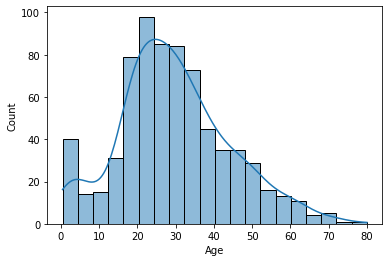

In [5]:
sns.histplot(train2_df["Age"], kde=True)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

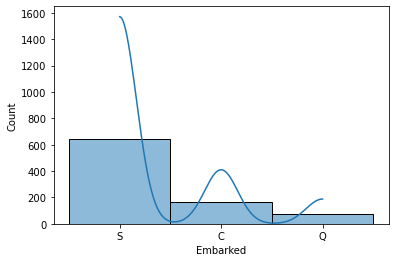

In [6]:
sns.histplot(train2_df["Embarked"], kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

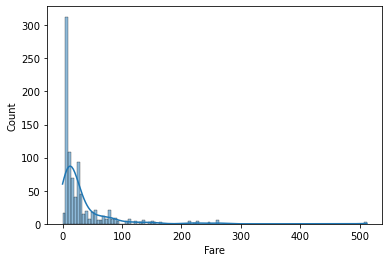

In [7]:
sns.histplot(train2_df["Fare"], kde=True)

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

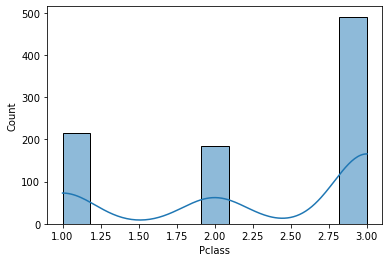

In [8]:
sns.histplot(train2_df["Pclass"], kde=True)

## corr()

#### Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python.

In [9]:
train2_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Heat Map Generation

#### A heatmap is a graphical representation of data where each value of a matrix is represented as a color. The heatmap that we have used here is made using the seaborn library.

<AxesSubplot:>

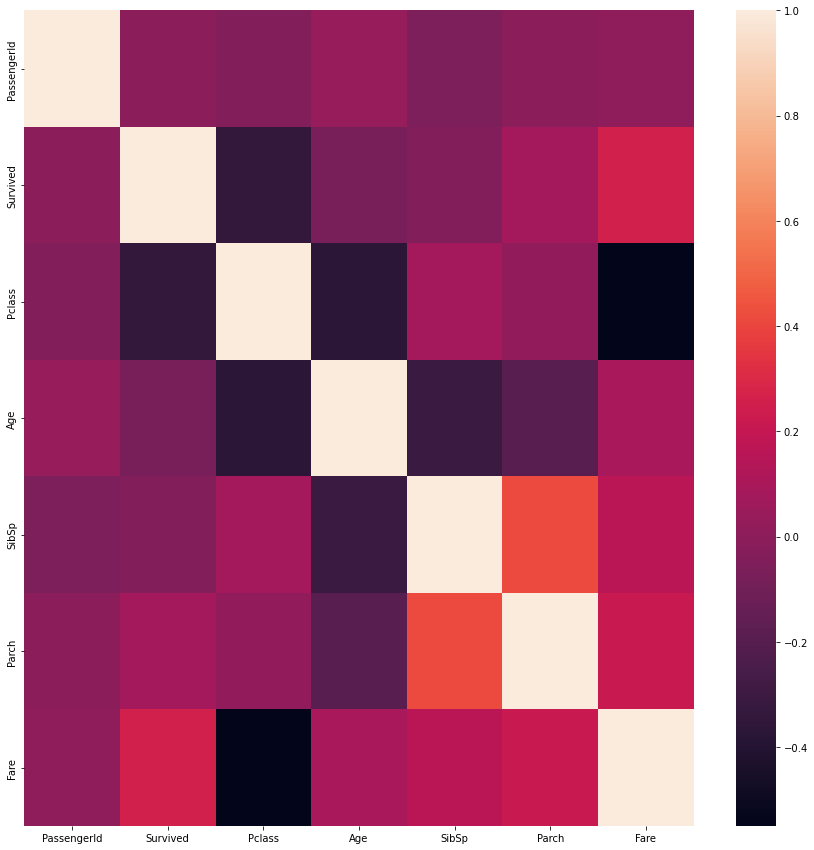

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(train2_df.corr())

## Detecting missing values

#### We make use of isna() function to detect the null values in both train and test dataframes.

In [11]:
train2_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test2_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
## Mode and Mean

#### Filling Cabin column with Mode of the values since it is a categorical column.
#### Filling Embarked column with Mode of the values since it is a categorical column.
#### Filling Age column with Mean of the values since it is a numerical column.
#### Filling Fare column with Mode of the values since it is a categorical column.

In [14]:
mode=train2_df["Cabin"].mode()
train2_df["Cabin"]=train2_df["Cabin"].fillna(mode[0])
train2_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [15]:
m=train2_df["Embarked"].mode()
train2_df["Embarked"]=train2_df["Embarked"].fillna(m[0])
train2_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [16]:
mean=train2_df["Age"].mean()
train2_df["Age"]=train2_df["Age"].fillna(mean)
train2_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
mode=test2_df["Cabin"].mode()
test2_df["Cabin"]=test2_df["Cabin"].fillna(mode[0])
test2_df.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [18]:
mode=test2_df["Fare"].mode()
test2_df["Fare"]=test2_df["Fare"].fillna(mode[0])
test2_df.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [19]:
mean=test2_df["Age"].mean()
test2_df["Age"]=test2_df["Age"].fillna(mean)
test2_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Appending the categorical data in a list

In [20]:
categ=[]
for j in train2_df.columns:
    if train2_df[j].dtypes=="object":
        categ.append(j)

In [21]:
print(categ)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


## label encode categorical columns

In [22]:
k=LabelEncoder()

In [23]:
train2_dfcopy=train2_df.copy()
train2_dfcopy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [24]:
for j in categ:
    train2_df[j+"_new"]=k.fit_transform(train2_df[j])
    
train2_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_new,Sex_new,Ticket_new,Cabin_new,Embarked_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,108,1,523,47,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,190,0,596,81,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,353,0,669,47,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,272,0,49,55,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,15,1,472,47,2


In [25]:
categt=[]
for j in test2_df.columns:
    if test2_df[j].dtypes=="object":
        categt.append(j)

In [26]:
print(categt)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [27]:
test2_dfcopy=test2_df.copy()
test2_dfcopy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S


In [28]:
for j in categt:
    test2_df[j+"_new"]=k.fit_transform(test2_df[j])
    
test2_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_new,Sex_new,Ticket_new,Cabin_new,Embarked_new
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q,206,1,152,15,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S,403,0,221,15,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,269,1,73,15,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S,408,1,147,15,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,178,0,138,15,2


## Logistic Regression

#### Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 

In [29]:
train2_df=train2_df.drop("Name", axis=1)

In [30]:
train2_df=train2_df.drop("Sex", axis=1)

In [31]:
train2_df=train2_df.drop("Ticket", axis=1)

In [32]:
train2_df=train2_df.drop("Cabin", axis=1)

In [33]:
train2_df=train2_df.drop("Embarked", axis=1)

In [34]:
L = LogisticRegression()

In [35]:
selected = train2_df.drop("Survived",axis=1)
Target = train2_df["Survived"]

In [36]:
X_train, X_test, y_train, y_test=train_test_split(selected, Target, test_size=0.6, random_state=42)

In [37]:
X_train = train2_df.drop(['Survived'], axis=1)
y_train = train2_df['Survived']
X_train.shape, y_train.shape, X_test.shape

((891, 11), (891,), (535, 11))

In [38]:
L.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
L.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [40]:
print(L.score(X_test,y_test))

0.794392523364486


<AxesSubplot:xlabel='Survived', ylabel='Count'>

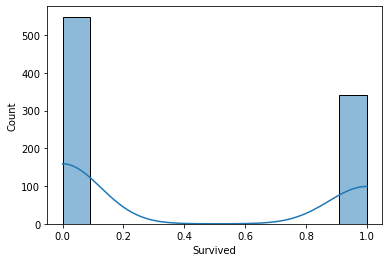

In [41]:
sns.histplot(train2_df["Survived"], kde=True)

## Process

1. Importing libraries
2. Loading the dataset
3. Detecting the missing values
4. Cleaning the data - Feature Engineering

    4.a Replacing the categorical features with Mode 
    
    4.b Replacing the numerical features with Mean
    
    
5. Plotting the visualizations
6. Label encoding
7. Logistic regression
8. Plotting the results



## Insights

#### In fitting models there are two features that are always given high priority. Like the most important predictors: TitleMr and Pclass3. Therefore the odds of survival of any passenger are low when they fall in the above categories.